In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
Comparison = pd.read_csv("Output Data/DetectionComparison.csv")

In [3]:
Comparison

,t,ID (CME),x (CME),y (CME),z (CME),FI (CME),t_ig,ID (Dino),x (Dino),y (Dino),z (Dino),FI (Dino),Distance,Multi ID (Dino),Multi Distance (Dino)
0,1.0,1.0,274.71,525.42,3.6937,97.040,1.0,52.0,274.48068,524.21180,5.474521,325.2,2.164176,52,2.16
1,2.0,1.0,251.01,609.49,3.5601,396.630,2.0,27.0,249.81906,607.51350,4.625826,466.5,2.541783,27,2.54
2,3.0,1.0,264.57,195.31,3.2682,165.200,3.0,14.0,262.21835,194.15587,4.806121,333.0,3.037676,14,3.04
3,4.0,1.0,317.08,464.08,3.9960,92.903,4.0,25.0,315.35614,463.78522,5.874369,347.2,2.566488,25,2.57
4,5.0,1.0,262.84,321.84,3.1810,41.852,5.0,12.0,266.77200,339.10565,5.584880,298.5,17.870141,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97490,6.0,1036.0,764.20,231.59,162.9600,106.300,6.0,1324.0,763.54175,231.58992,161.291430,332.0,1.793717,1324,1.79
97491,2.0,1037.0,779.66,196.51,163.7400,380.120,2.0,1548.0,781.31775,197.35864,159.530270,511.2,4.603276,"1548,1740","4.60,4.95"
97492,3.0,1037.0,566.87,636.90,163.2000,315.040,3.0,1335.0,566.52760,635.95306,161.369100,408.0,2.089528,1335,2.09
97493,2.0,1038.0,516.72,337.65,162.7900,150.320,2.0,1755.0,517.55680,336.39734,165.416410,343.0,3.027775,"1621,1755","3.54,3.03"


In [4]:
M_comp = Comparison.to_numpy()
t_vec = defaultdict(list)

for t in M_comp:
    t_vec[t[0]].append(t)

for t_val in t_vec:
    t_vec[t_val] = np.array(t_vec[t_val]) 

t_list = np.zeros((len(t_vec),3), dtype=object)

In [5]:
for i, t in enumerate(t_vec):
        
    t_val = t_vec[t]
    counts = len((t_val[:,12]))
    true_counts = (np.sum(t_val[:,12] < 3.5))
    t_list[i][0] = int(t)
    t_list[i][1] = counts
    t_list[i][2] = true_counts

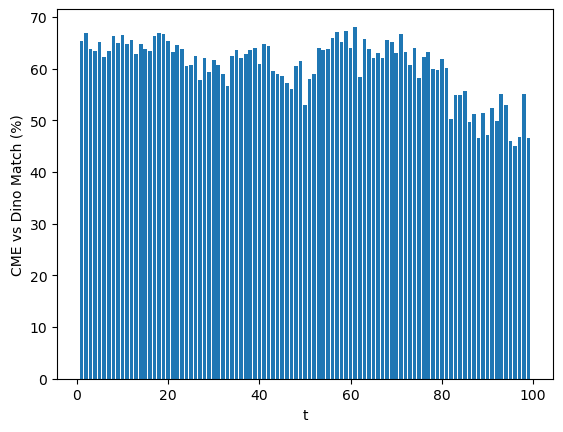

In [6]:
plt.bar(t_list[:,0], 100*t_list[:,2]/t_list[:,1])
plt.xlabel("t")
plt.ylabel("CME vs Dino Match (%)")
plt.show()

In [7]:
Comparison = Comparison.drop("t_ig", axis=1)
display(Comparison[Comparison["FI (CME)"]<230])

,t,ID (CME),x (CME),y (CME),z (CME),FI (CME),ID (Dino),x (Dino),y (Dino),z (Dino),FI (Dino),Distance,Multi ID (Dino),Multi Distance (Dino)
0,1.0,1.0,274.71,525.42,3.6937,97.040,52.0,274.48068,524.21180,5.474521,325.2,2.164176,52,2.16
2,3.0,1.0,264.57,195.31,3.2682,165.200,14.0,262.21835,194.15587,4.806121,333.0,3.037676,14,3.04
3,4.0,1.0,317.08,464.08,3.9960,92.903,25.0,315.35614,463.78522,5.874369,347.2,2.566488,25,2.57
4,5.0,1.0,262.84,321.84,3.1810,41.852,12.0,266.77200,339.10565,5.584880,298.5,17.870141,NaN,NaN
5,6.0,1.0,258.68,363.58,3.8517,75.243,113.0,270.64526,353.61963,13.657455,313.2,18.399164,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97484,2.0,1035.0,515.57,377.89,162.0700,113.330,1598.0,513.87650,376.81863,160.978090,314.2,2.282114,1598,2.28
97488,2.0,1036.0,545.76,296.39,160.1500,58.140,1672.0,544.48553,297.35226,163.480880,299.2,3.693911,1672,3.69
97489,3.0,1036.0,562.84,661.42,162.5400,208.700,1336.0,563.89880,660.74430,161.504360,372.8,1.627937,1336,1.63
97490,6.0,1036.0,764.20,231.59,162.9600,106.300,1324.0,763.54175,231.58992,161.291430,332.0,1.793717,1324,1.79


In [8]:
Comparison.to_csv("Output Data/CME_as_base.csv", index=False)

FI_bin
(13.154, 16.497]          20
(16.497, 19.839]         183
(19.839, 23.182]         478
(23.182, 26.525]         868
(26.525, 29.868]        1376
                        ... 
(1330.186, 1333.529]       0
(1333.529, 1336.872]       0
(1336.872, 1340.215]       0
(1340.215, 1343.557]       0
(1343.557, 1346.9]         1
Length: 399, dtype: int64
FI_bin
(13.154, 16.497]         0
(16.497, 19.839]         0
(19.839, 23.182]         0
(23.182, 26.525]         2
(26.525, 29.868]        19
                        ..
(1330.186, 1333.529]     0
(1333.529, 1336.872]     0
(1336.872, 1340.215]     0
(1340.215, 1343.557]     0
(1343.557, 1346.9]       1
Length: 399, dtype: int64


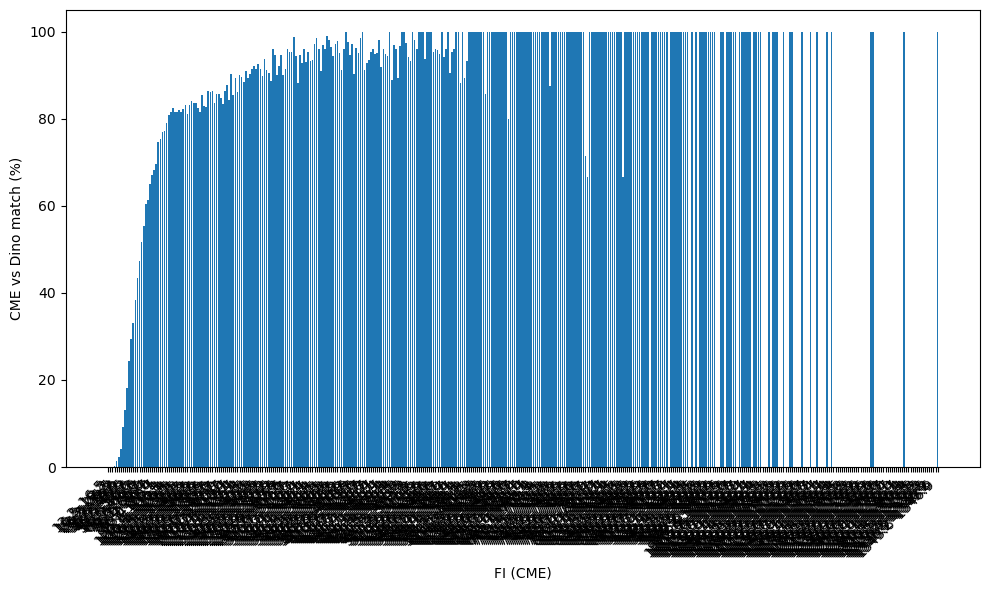

In [10]:
df = Comparison

bins = np.linspace(df["FI (CME)"].min(), df["FI (CME)"].max(), 400)

df["FI_bin"] = pd.cut(df["FI (CME)"], bins)

total_per_bin = df.groupby("FI_bin",observed =False).size()

matches_per_bin = df[df["Distance"] < 3.5].groupby("FI_bin",observed=False).size()

interval_labels = [f"{round(bins[i],1)}–{round(bins[i+1],1)}" for i in range(len(bins)-1)]

fraction = (matches_per_bin / total_per_bin).values

print(total_per_bin)
print(matches_per_bin)

plt.figure(figsize=(10, 6))
plt.bar(interval_labels,100*fraction)
plt.xlabel("FI (CME)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("CME vs Dino match (%)")
plt.tight_layout()
plt.show()